# Part 1: Data Loading and Splitting

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import models
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.transforms import ToTensor

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of training samples: 40000
Number of validation samples: 10000
Number of test samples: 10000


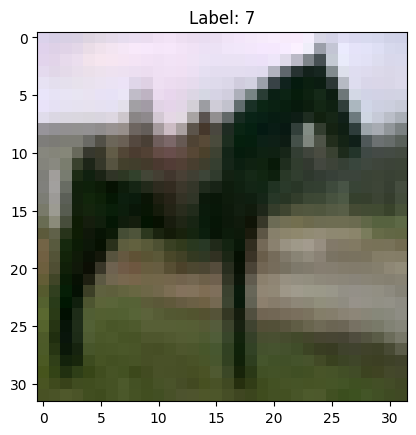

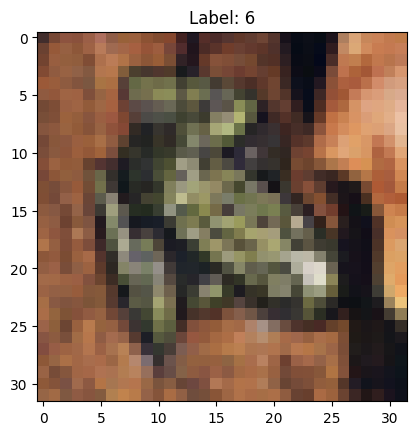

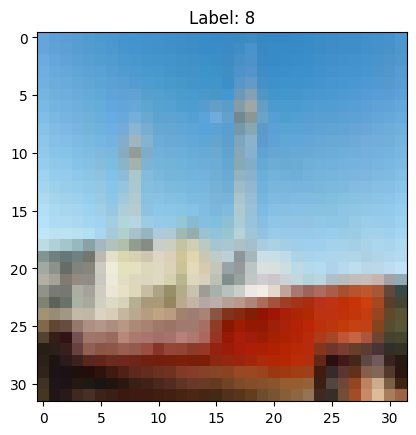

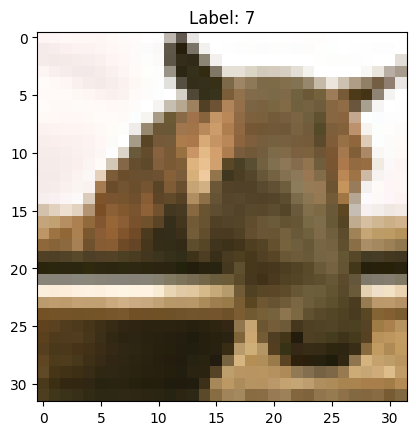

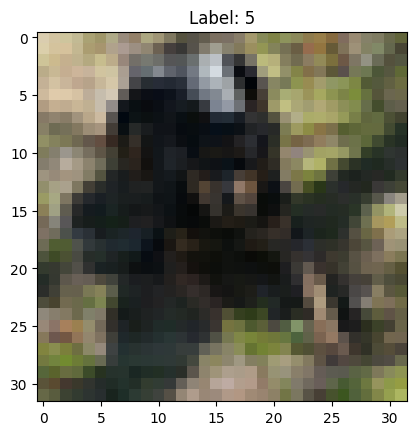

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download and load the CIFAR-10 dataset
train_dataset_full = CIFAR10(root='./data', train=True, download=True, transform=None)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=None)

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset_full))  # 80% for training
val_size = len(train_dataset_full) - train_size   # 20% for validation
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

# Check dataset sizes
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

# Display first five images from training data
for i in range(5):
    img, label = train_dataset[i]
    img = ToTensor()(img)  # Convert PIL image to tensor
    img = img.permute(1, 2, 0)  # Change dimension order for plotting (C, H, W -> H, W, C)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.show()

# Define the train_and_evaluate function with accuracy and loss curves
def train_and_evaluate(model, optimizer, train_loader, val_loader, num_epochs=10, model_name="Model"):
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc=f"Training {model_name} - Epoch {epoch+1}/{num_epochs}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Validation {model_name} - Epoch {epoch+1}/{num_epochs}", leave=False):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = running_loss / len(val_loader.dataset)
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] - {model_name} Results:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Plot training and validation loss curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss Curve')
    plt.legend()

    # Plot training and validation accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy Curve')
    plt.legend()
    plt.show()

# Define the test_evaluate function
def test_evaluate(model, test_loader, model_name="Model"):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc=f"Testing {model_name}"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader.dataset)
    test_acc = correct / total
    print(f"{model_name} - Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Part 2: ResNet-18

## 2.1 ResNet-18 Baseline Model (train it from scratch)

Training Baseline ResNet-18


Epoch [1/10] - Baseline ResNet-18 Results:
Train Loss: 1.7333, Train Acc: 0.3851
Val Loss: 1.5033, Val Acc: 0.4778


Epoch [2/10] - Baseline ResNet-18 Results:
Train Loss: 1.3820, Train Acc: 0.5165
Val Loss: 1.4341, Val Acc: 0.5391


Epoch [3/10] - Baseline ResNet-18 Results:
Train Loss: 1.1774, Train Acc: 0.5860
Val Loss: 1.0381, Val Acc: 0.6312


Epoch [4/10] - Baseline ResNet-18 Results:
Train Loss: 1.0546, Train Acc: 0.6313
Val Loss: 1.0475, Val Acc: 0.6332


Epoch [5/10] - Baseline ResNet-18 Results:
Train Loss: 0.9713, Train Acc: 0.6610
Val Loss: 0.9240, Val Acc: 0.6785


Epoch [6/10] - Baseline ResNet-18 Results:
Train Loss: 0.9020, Train Acc: 0.6885
Val Loss: 0.8847, Val Acc: 0.6898


Epoch [7/10] - Baseline ResNet-18 Results:
Train Loss: 0.8495, Train Acc: 0.7029
Val Loss: 0.8166, Val Acc: 0.7125


Epoch [8/10] - Baseline ResNet-18 Results:
Train Loss: 0.8005, Train Acc: 0.7226
Val Loss: 0.7386, Val Acc: 0.7393


Epoch [9/10] - Baseline ResNet-18 Results:
Train Loss: 0.7713, Train Acc: 0.7333
Val Loss: 0.7098, Val Acc: 0.7528


Epoch [10/10] - Baseline ResNet-18 Results:
Train Loss: 0.7287, Train Acc: 0.7448
Val Loss: 0.6423, Val Acc: 0.7746


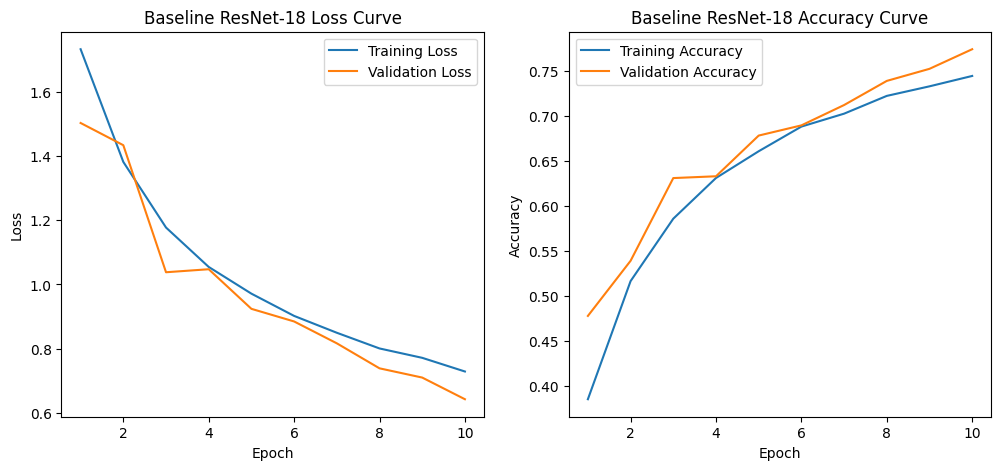


Testing Baseline ResNet-18


Testing Baseline ResNet-18: 100%|██████████| 157/157 [00:04<00:00, 34.67it/s]

Baseline ResNet-18 - Test Loss: 0.7349, Test Acc: 0.7451


In [3]:
# Baseline transformation for ResNet-18
transform_baseline_resnet18 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# DataLoader for ResNet-18 Baseline Model
train_loader_resnet_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_resnet18), batch_size=64, shuffle=True, num_workers=0)
val_loader_resnet_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_resnet18), batch_size=64, shuffle=False, num_workers=0)
test_loader_resnet_baseline = DataLoader(CIFAR10(root='./data', train=False, transform=transform_baseline_resnet18), batch_size=64, shuffle=False, num_workers=0)

# Define ResNet-18 Baseline Model
class BaselineResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(BaselineResNet18, self).__init__()
        self.model = models.resnet18(weights=None)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

baseline_resnet_model = BaselineResNet18().to(device)
baseline_resnet_optimizer = optim.SGD(baseline_resnet_model.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate ResNet-18 Baseline Model
print("Training Baseline ResNet-18")
train_and_evaluate(baseline_resnet_model, baseline_resnet_optimizer, train_loader_resnet_baseline, val_loader_resnet_baseline, model_name="Baseline ResNet-18")

# Test ResNet-18 Baseline Model
print("\nTesting Baseline ResNet-18")
test_evaluate(baseline_resnet_model, test_loader_resnet_baseline, model_name="Baseline ResNet-18")

## 2.2 ResNet-18 Optimized Model

Training Optimized ResNet-18


Epoch [1/10] - Optimized ResNet-18 Results:
Train Loss: 1.5627, Train Acc: 0.4433
Val Loss: 1.2859, Val Acc: 0.5404


Epoch [2/10] - Optimized ResNet-18 Results:
Train Loss: 1.1613, Train Acc: 0.5953
Val Loss: 1.0090, Val Acc: 0.6446


Epoch [3/10] - Optimized ResNet-18 Results:
Train Loss: 1.0077, Train Acc: 0.6537
Val Loss: 0.8846, Val Acc: 0.6925


Epoch [4/10] - Optimized ResNet-18 Results:
Train Loss: 0.8967, Train Acc: 0.6923
Val Loss: 0.7849, Val Acc: 0.7245


Epoch [5/10] - Optimized ResNet-18 Results:
Train Loss: 0.8250, Train Acc: 0.7152
Val Loss: 0.7309, Val Acc: 0.7487


Epoch [6/10] - Optimized ResNet-18 Results:
Train Loss: 0.7591, Train Acc: 0.7376
Val Loss: 0.7397, Val Acc: 0.7443


Epoch [7/10] - Optimized ResNet-18 Results:
Train Loss: 0.7127, Train Acc: 0.7559
Val Loss: 0.6195, Val Acc: 0.7855


Epoch [8/10] - Optimized ResNet-18 Results:
Train Loss: 0.6740, Train Acc: 0.7677
Val Loss: 0.5929, Val Acc: 0.7932


Epoch [9/10] - Optimized ResNet-18 Results:
Train Loss: 0.6322, Train Acc: 0.7840
Val Loss: 0.5570, Val Acc: 0.8088


Epoch [10/10] - Optimized ResNet-18 Results:
Train Loss: 0.6100, Train Acc: 0.7933
Val Loss: 0.5434, Val Acc: 0.8117


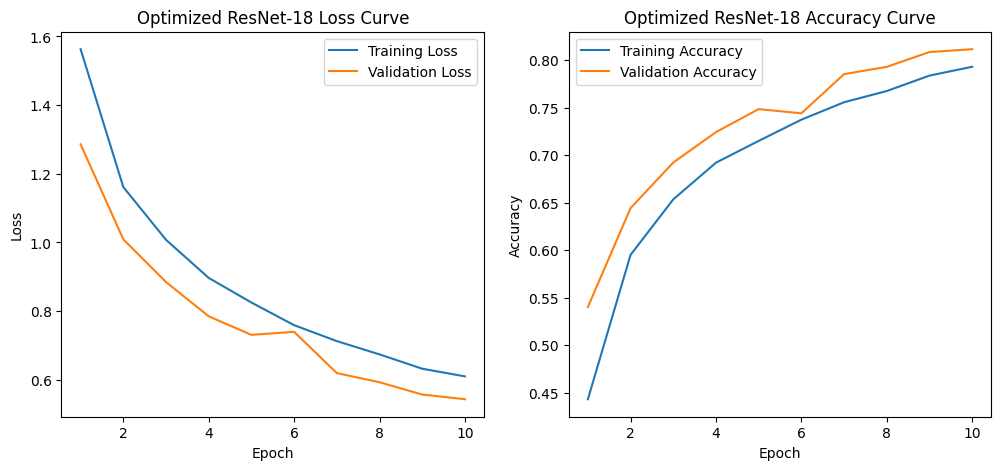


Testing Optimized ResNet-18


Testing Optimized ResNet-18: 100%|██████████| 157/157 [00:07<00:00, 21.28it/s]

Optimized ResNet-18 - Test Loss: 0.7341, Test Acc: 0.7549


In [4]:
# Optimized transformation for ResNet-18
transform_optimized_resnet18 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# DataLoader for ResNet-18 Optimized Model
train_loader_resnet_optimized = DataLoader(CIFAR10(root='./data', train=True, transform=transform_optimized_resnet18), batch_size=64, shuffle=True, num_workers=0)
val_loader_resnet_optimized = DataLoader(CIFAR10(root='./data', train=True, transform=transform_optimized_resnet18), batch_size=64, shuffle=False, num_workers=0)
test_loader_resnet_optimized = DataLoader(CIFAR10(root='./data', train=False, transform=transform_optimized_resnet18), batch_size=64, shuffle=False, num_workers=0)

# Define ResNet-18 Optimized Model
class OptimizedResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedResNet18, self).__init__()
        self.model = models.resnet18(weights=None)
        self.model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(self.model.fc.in_features, num_classes)
        )

    def forward(self, x):
        return self.model(x)

optimized_resnet_model = OptimizedResNet18().to(device)
optimized_resnet_optimizer = optim.Adam(optimized_resnet_model.parameters(), lr=0.001)

# Train and evaluate ResNet-18 Optimized Model
print("Training Optimized ResNet-18")
train_and_evaluate(optimized_resnet_model, optimized_resnet_optimizer, train_loader_resnet_optimized, val_loader_resnet_optimized, model_name="Optimized ResNet-18")

# Test ResNet-18 Optimized Model
print("\nTesting Optimized ResNet-18")
test_evaluate(optimized_resnet_model, test_loader_resnet_optimized, model_name="Optimized ResNet-18")

# Part 3: MobileNet

## 3.1 MobileNet Baseline Model(train it from scratch)

Training Baseline MobileNet


Epoch [1/10] - Baseline MobileNet Results:
Train Loss: 1.5128, Train Acc: 0.4430
Val Loss: 1.1961, Val Acc: 0.5741


Epoch [2/10] - Baseline MobileNet Results:
Train Loss: 0.9723, Train Acc: 0.6572
Val Loss: 0.7980, Val Acc: 0.7206


Epoch [3/10] - Baseline MobileNet Results:
Train Loss: 0.7307, Train Acc: 0.7448
Val Loss: 0.6754, Val Acc: 0.7669


Epoch [4/10] - Baseline MobileNet Results:
Train Loss: 0.6023, Train Acc: 0.7924
Val Loss: 0.5090, Val Acc: 0.8253


Epoch [5/10] - Baseline MobileNet Results:
Train Loss: 0.5180, Train Acc: 0.8189
Val Loss: 0.4127, Val Acc: 0.8574


Epoch [6/10] - Baseline MobileNet Results:
Train Loss: 0.4533, Train Acc: 0.8433
Val Loss: 0.3445, Val Acc: 0.8794


Epoch [7/10] - Baseline MobileNet Results:
Train Loss: 0.4029, Train Acc: 0.8599
Val Loss: 0.3194, Val Acc: 0.8894


Epoch [8/10] - Baseline MobileNet Results:
Train Loss: 0.3606, Train Acc: 0.8761
Val Loss: 0.2845, Val Acc: 0.9017


Epoch [9/10] - Baseline MobileNet Results:
Train Loss: 0.3209, Train Acc: 0.8866
Val Loss: 0.2697, Val Acc: 0.9069


Epoch [10/10] - Baseline MobileNet Results:
Train Loss: 0.2977, Train Acc: 0.8960
Val Loss: 0.2319, Val Acc: 0.9205


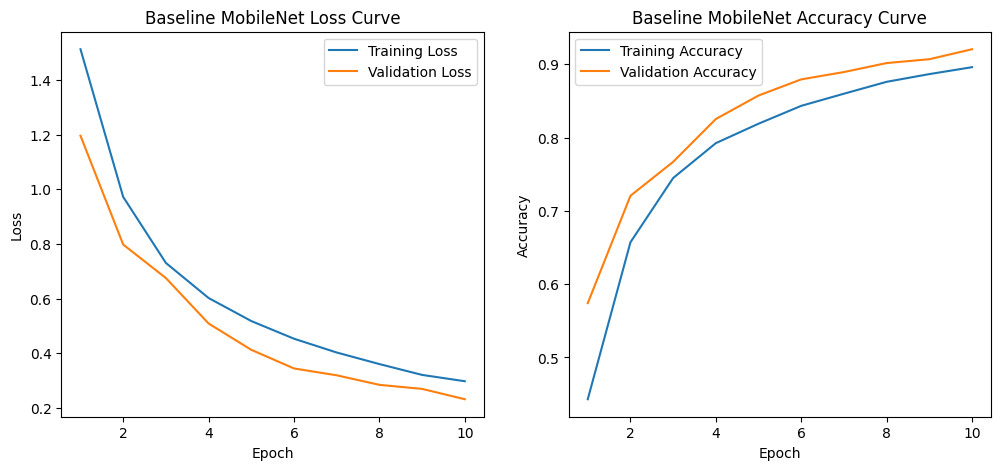


Testing Baseline MobileNet


Testing Baseline MobileNet: 100%|██████████| 157/157 [00:15<00:00,  9.96it/s]

Baseline MobileNet - Test Loss: 0.4544, Test Acc: 0.8496


In [5]:
# Baseline transformation for MobileNet
transform_baseline_mobilenet = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224 as required by MobileNet
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# DataLoader for MobileNet Baseline Model
train_loader_mobilenet_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_mobilenet), batch_size=64, shuffle=True, num_workers=0)
val_loader_mobilenet_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_mobilenet), batch_size=64, shuffle=False, num_workers=0)
test_loader_mobilenet_baseline = DataLoader(CIFAR10(root='./data', train=False, transform=transform_baseline_mobilenet), batch_size=64, shuffle=False, num_workers=0)

# Define MobileNet Baseline Model
class BaselineMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(BaselineMobileNet, self).__init__()
        self.model = models.mobilenet_v2(weights=None)
        self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, num_classes)

    def forward(self, x):
        return self.model(x)

baseline_mobilenet_model = BaselineMobileNet().to(device)
baseline_mobilenet_optimizer = optim.SGD(baseline_mobilenet_model.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate MobileNet Baseline Model
print("Training Baseline MobileNet")
train_and_evaluate(baseline_mobilenet_model, baseline_mobilenet_optimizer, train_loader_mobilenet_baseline, val_loader_mobilenet_baseline, model_name="Baseline MobileNet")

# Test MobileNet Baseline Model
print("\nTesting Baseline MobileNet")
test_evaluate(baseline_mobilenet_model, test_loader_mobilenet_baseline, model_name="Baseline MobileNet")

## 3.2 MobileNet Optimized Model

Training Optimized MobileNet


Epoch [1/10] - Optimized MobileNet Results:
Train Loss: 1.4193, Train Acc: 0.4798
Val Loss: 1.0147, Val Acc: 0.6407


Epoch [2/10] - Optimized MobileNet Results:
Train Loss: 0.9108, Train Acc: 0.6802
Val Loss: 0.8718, Val Acc: 0.7021


Epoch [3/10] - Optimized MobileNet Results:
Train Loss: 0.7070, Train Acc: 0.7568
Val Loss: 0.6448, Val Acc: 0.7771


Epoch [4/10] - Optimized MobileNet Results:
Train Loss: 0.6065, Train Acc: 0.7911
Val Loss: 0.5326, Val Acc: 0.8151


Epoch [5/10] - Optimized MobileNet Results:
Train Loss: 0.5352, Train Acc: 0.8167
Val Loss: 0.4539, Val Acc: 0.8462


Epoch [6/10] - Optimized MobileNet Results:
Train Loss: 0.4836, Train Acc: 0.8338
Val Loss: 0.4150, Val Acc: 0.8531


Epoch [7/10] - Optimized MobileNet Results:
Train Loss: 0.4389, Train Acc: 0.8499
Val Loss: 0.3590, Val Acc: 0.8747


Epoch [8/10] - Optimized MobileNet Results:
Train Loss: 0.4018, Train Acc: 0.8617
Val Loss: 0.3285, Val Acc: 0.8869


Epoch [9/10] - Optimized MobileNet Results:
Train Loss: 0.3705, Train Acc: 0.8744
Val Loss: 0.3188, Val Acc: 0.8892


Epoch [10/10] - Optimized MobileNet Results:
Train Loss: 0.3460, Train Acc: 0.8800
Val Loss: 0.2969, Val Acc: 0.8970


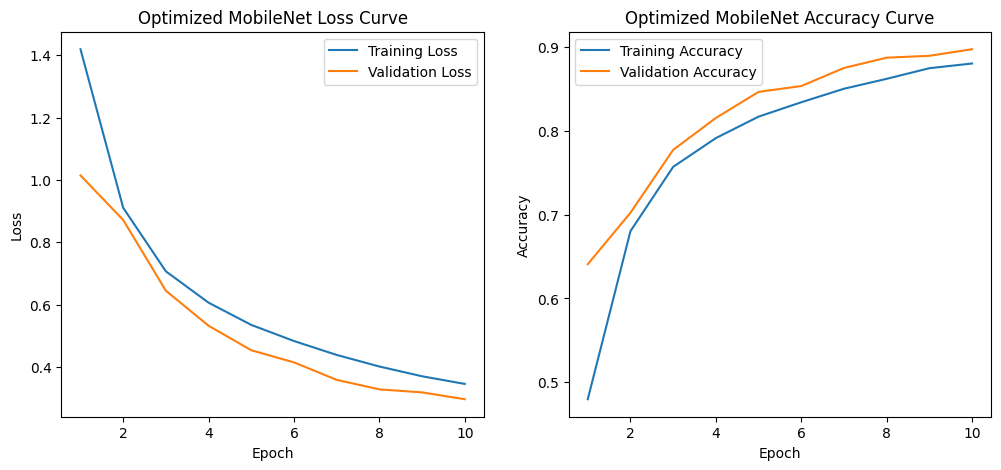


Testing Optimized MobileNet


Testing Optimized MobileNet: 100%|██████████| 157/157 [00:30<00:00,  5.10it/s]

Optimized MobileNet - Test Loss: 0.4307, Test Acc: 0.8569


In [6]:
# Optimized transformation for MobileNet
transform_optimized_mobilenet = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# DataLoader for MobileNet Optimized Model
train_loader_mobilenet_optimized = DataLoader(CIFAR10(root='./data', train=True, transform=transform_optimized_mobilenet), batch_size=64, shuffle=True, num_workers=0)
val_loader_mobilenet_optimized = DataLoader(CIFAR10(root='./data', train=True, transform=transform_optimized_mobilenet), batch_size=64, shuffle=False, num_workers=0)
test_loader_mobilenet_optimized = DataLoader(CIFAR10(root='./data', train=False, transform=transform_optimized_mobilenet), batch_size=64, shuffle=False, num_workers=0)

# Define MobileNet Optimized Model
class OptimizedMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedMobileNet, self).__init__()
        self.model = models.mobilenet_v2(weights=None)
        self.model.classifier[1] = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(self.model.classifier[1].in_features, num_classes)
        )

    def forward(self, x):
        return self.model(x)

optimized_mobilenet_model = OptimizedMobileNet().to(device)
optimized_mobilenet_optimizer = optim.Adam(optimized_mobilenet_model.parameters(), lr=0.001)

# Train and evaluate MobileNet Optimized Model
print("Training Optimized MobileNet")
train_and_evaluate(optimized_mobilenet_model, optimized_mobilenet_optimizer, train_loader_mobilenet_optimized, val_loader_mobilenet_optimized, model_name="Optimized MobileNet")

# Test MobileNet Optimized Model
print("\nTesting Optimized MobileNet")
test_evaluate(optimized_mobilenet_model, test_loader_mobilenet_optimized, model_name="Optimized MobileNet")

# Part 4: VGG-16

## 4.1 VGG-16 Baseline Model (train it from scratch)

Training Baseline VGG-16


Epoch [1/10] - Baseline VGG-16 Results:
Train Loss: 1.7778, Train Acc: 0.3437
Val Loss: 1.4373, Val Acc: 0.4819


Epoch [2/10] - Baseline VGG-16 Results:
Train Loss: 1.2250, Train Acc: 0.5595
Val Loss: 1.0112, Val Acc: 0.6461


Epoch [3/10] - Baseline VGG-16 Results:
Train Loss: 0.9203, Train Acc: 0.6774
Val Loss: 0.6939, Val Acc: 0.7573


Epoch [4/10] - Baseline VGG-16 Results:
Train Loss: 0.7340, Train Acc: 0.7439
Val Loss: 0.6591, Val Acc: 0.7746


Epoch [5/10] - Baseline VGG-16 Results:
Train Loss: 0.6168, Train Acc: 0.7864
Val Loss: 0.4651, Val Acc: 0.8398


Epoch [6/10] - Baseline VGG-16 Results:
Train Loss: 0.5232, Train Acc: 0.8204
Val Loss: 0.3935, Val Acc: 0.8693


Epoch [7/10] - Baseline VGG-16 Results:
Train Loss: 0.4519, Train Acc: 0.8438
Val Loss: 0.3411, Val Acc: 0.8904


Epoch [8/10] - Baseline VGG-16 Results:
Train Loss: 0.3848, Train Acc: 0.8686
Val Loss: 0.2577, Val Acc: 0.9170


Epoch [9/10] - Baseline VGG-16 Results:
Train Loss: 0.3291, Train Acc: 0.8881
Val Loss: 0.2084, Val Acc: 0.9317


Epoch [10/10] - Baseline VGG-16 Results:
Train Loss: 0.2807, Train Acc: 0.9030
Val Loss: 0.1914, Val Acc: 0.9374


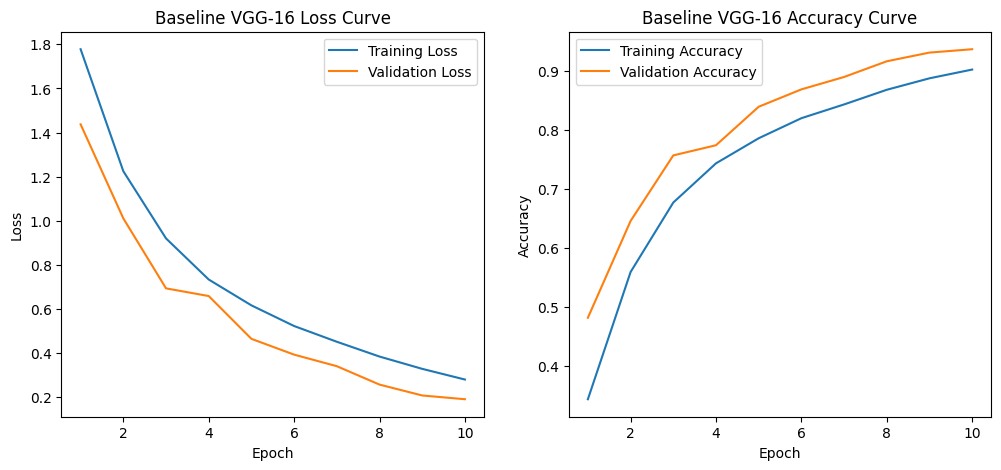


Testing Baseline VGG-16


Testing Baseline VGG-16: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s]

Baseline VGG-16 - Test Loss: 0.5328, Test Acc: 0.8290


In [7]:
# Baseline transformation for VGG-16
transform_baseline_vgg16 = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224 as required by VGG-16
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# DataLoader for VGG-16 Baseline Model
train_loader_vgg16_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_vgg16), batch_size=64, shuffle=True, num_workers=0)
val_loader_vgg16_baseline = DataLoader(CIFAR10(root='./data', train=True, transform=transform_baseline_vgg16), batch_size=64, shuffle=False, num_workers=0)
test_loader_vgg16_baseline = DataLoader(CIFAR10(root='./data', train=False, transform=transform_baseline_vgg16), batch_size=64, shuffle=False, num_workers=0)

# Define VGG-16 Baseline Model
class BaselineVGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(BaselineVGG16, self).__init__()
        self.model = models.vgg16(weights=None)
        self.model.classifier[6] = nn.Linear(self.model.classifier[6].in_features, num_classes)

    def forward(self, x):
        return self.model(x)

baseline_vgg16_model = BaselineVGG16().to(device)
baseline_vgg16_optimizer = optim.SGD(baseline_vgg16_model.parameters(), lr=0.01, momentum=0.9)

# Train and evaluate VGG-16 Baseline Model
print("Training Baseline VGG-16")
train_and_evaluate(baseline_vgg16_model, baseline_vgg16_optimizer, train_loader_vgg16_baseline, val_loader_vgg16_baseline, model_name="Baseline VGG-16")

# Test VGG-16 Baseline Model
print("\nTesting Baseline VGG-16")
test_evaluate(baseline_vgg16_model, test_loader_vgg16_baseline, model_name="Baseline VGG-16")

## 4.2 VGG-16 Optimized Model

Training Optimized VGG-16


Epoch [1/10] - Optimized VGG-16 Results:
Train Loss: 1.7632, Train Acc: 0.3395
Val Loss: 1.3733, Val Acc: 0.4970


Epoch [2/10] - Optimized VGG-16 Results:
Train Loss: 1.2303, Train Acc: 0.5598
Val Loss: 1.0066, Val Acc: 0.6404


Epoch [3/10] - Optimized VGG-16 Results:
Train Loss: 0.9409, Train Acc: 0.6716
Val Loss: 0.7977, Val Acc: 0.7273


Epoch [4/10] - Optimized VGG-16 Results:
Train Loss: 0.7946, Train Acc: 0.7232
Val Loss: 0.6852, Val Acc: 0.7659


Epoch [5/10] - Optimized VGG-16 Results:
Train Loss: 0.6926, Train Acc: 0.7600
Val Loss: 0.5535, Val Acc: 0.8106


Epoch [6/10] - Optimized VGG-16 Results:
Train Loss: 0.6135, Train Acc: 0.7891
Val Loss: 0.5145, Val Acc: 0.8232


Epoch [7/10] - Optimized VGG-16 Results:
Train Loss: 0.5656, Train Acc: 0.8077
Val Loss: 0.4347, Val Acc: 0.8506


Epoch [8/10] - Optimized VGG-16 Results:
Train Loss: 0.5134, Train Acc: 0.8245
Val Loss: 0.4311, Val Acc: 0.8529


Epoch [9/10] - Optimized VGG-16 Results:
Train Loss: 0.4787, Train Acc: 0.8365
Val Loss: 0.3388, Val Acc: 0.8853


Epoch [10/10] - Optimized VGG-16 Results:
Train Loss: 0.4399, Train Acc: 0.8501
Val Loss: 0.3339, Val Acc: 0.8872


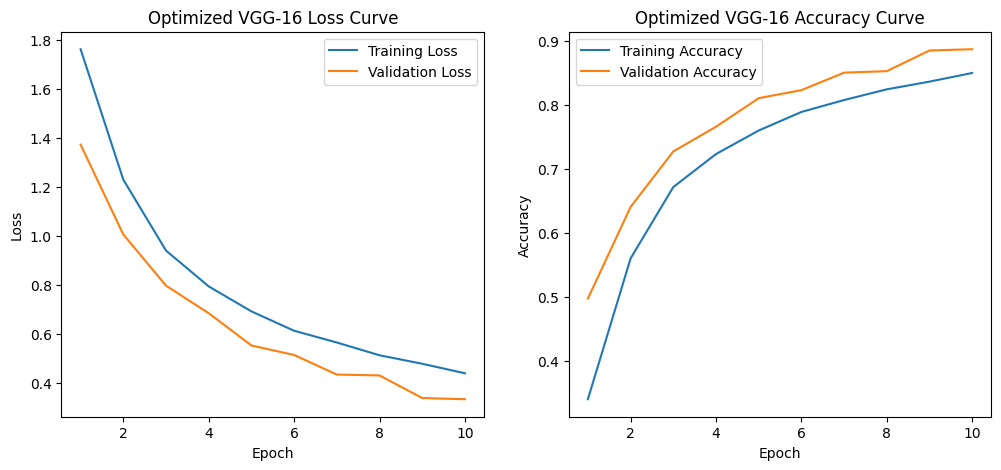


Testing Optimized VGG-16


Testing Optimized VGG-16: 100%|██████████| 157/157 [00:36<00:00,  4.35it/s]

Optimized VGG-16 - Test Loss: 0.5728, Test Acc: 0.8168


In [10]:
# Optimized transformation for VGG-16
transform_optimized_vgg16 = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# DataLoader for VGG-16 Optimized Model
train_loader_vgg16_optimized = DataLoader(
    CIFAR10(root='./data', train=True, transform=transform_optimized_vgg16),
    batch_size=64, shuffle=True, num_workers=0
)
val_loader_vgg16_optimized = DataLoader(
    CIFAR10(root='./data', train=True, transform=transform_optimized_vgg16),
    batch_size=64, shuffle=False, num_workers=0
)
test_loader_vgg16_optimized = DataLoader(
    CIFAR10(root='./data', train=False, transform=transform_optimized_vgg16),
    batch_size=64, shuffle=False, num_workers=0
)

# Define VGG-16 Optimized Model
class OptimizedVGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedVGG16, self).__init__()
        self.model = models.vgg16(weights=None)
        self.model.classifier[6] = nn.Sequential(
            nn.Dropout(0.5),  # Lowered dropout rate
            nn.Linear(self.model.classifier[6].in_features, num_classes)
        )

    def forward(self, x):
        return self.model(x)

optimized_vgg16_model = OptimizedVGG16().to(device)
optimized_vgg16_optimizer = optim.Adam(
    optimized_vgg16_model.parameters(), lr=0.0005, weight_decay=1e-4  # Increased LR and added weight decay
)


# Train and evaluate VGG-16 Optimized Model
print("Training Optimized VGG-16")
train_and_evaluate(optimized_vgg16_model, optimized_vgg16_optimizer, train_loader_vgg16_optimized, val_loader_vgg16_optimized, model_name="Optimized VGG-16")

# Test VGG-16 Optimized Model
print("\nTesting Optimized VGG-16")
test_evaluate(optimized_vgg16_model, test_loader_vgg16_optimized, model_name="Optimized VGG-16")